In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\DELL PC\Desktop\train_loanPrediction.csv")

In [3]:
#Quick data exploration
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
df.count(axis=0)

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

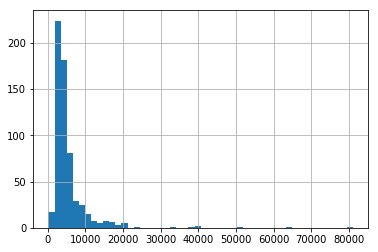

In [21]:
#distribution analysis
df['ApplicantIncome'].hist(bins=50)

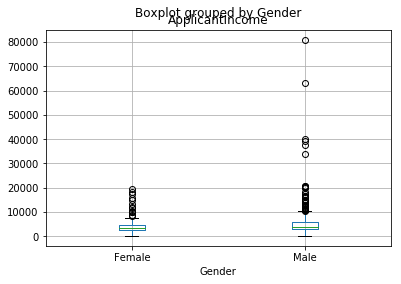

In [22]:
df.boxplot(column='ApplicantIncome',by='Gender') #group by gender

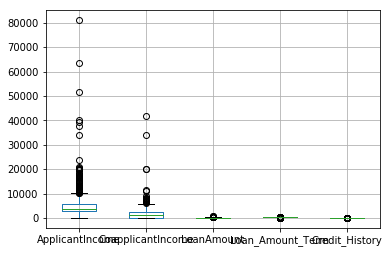

In [24]:
df.plot.box(grid=True)

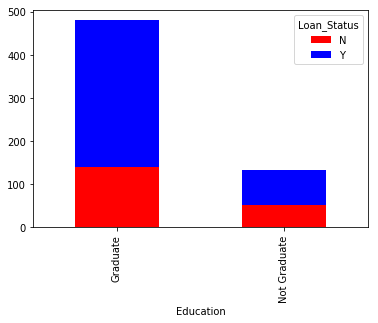

In [4]:
t1 = pd.crosstab(df['Education'],df['Loan_Status']) #categorical vaiable distribution
t1.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)#distribution of loan_status vs education

In [5]:
#count missing data in each column
df.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#filling the missing data
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


In [8]:
#checking whether missing data is filled or not
print(df['LoanAmount'].count())

614


In [10]:
#data Wrangling
df.groupby('ApplicantIncome').mean()[:5]


,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,,,,
150,1800.0,135.0,360.0,1.0
210,2917.0,98.0,360.0,1.0
416,41667.0,350.0,180.0,NaN
645,3683.0,113.0,480.0,1.0
674,5296.0,168.0,360.0,1.0


In [11]:
df.groupby('Married').get_group('Yes')[:5] #means ki bs vahi 5 columns aane chaiye jisme married=yes ho

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [12]:
#stastical analysis
print(df['ApplicantIncome']).mean() #can also put median and mode

5403.45928339


In [13]:
print(df['ApplicantIncome']).std() #can also put var and skew

6109.04167339


In [14]:
#p-value
stats.ttest_ind(df['ApplicantIncome'],df['CoapplicantIncome'])

Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)

In [15]:
#correlation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059878,-0.002056
LoanAmount,0.565620,0.187828,1.000000,0.038926,-0.008301
Loan_Amount_Term,-0.045306,-0.059878,0.038926,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008301,0.001470,1.000000


In [16]:
#chi-square
print(stats.chisquare(df['Education'].value_counts()))
print(stats.chisquare(df['Loan_Status'].value_counts()))


Power_divergenceResult(statistic=194.97719869706842, pvalue=2.6060806622869675e-44)
Power_divergenceResult(statistic=86.15635179153094, pvalue=1.6625705362253795e-20)


In [17]:
cont=pd.crosstab(df['Education'],df['Loan_Status'])
stats.chi2_contingency(cont)

(4.091490413303621,
 0.04309962129357355,
 1L,
 array([[150.09771987, 329.90228013],
        [ 41.90228013,  92.09771987]]))

In [18]:
#linear regression
from sklearn.linear_model import LinearRegression

In [19]:
X=np.array(df['ApplicantIncome']).reshape(-1,1)
Y=np.array(df['CoapplicantIncome']).reshape(-1,1)
linear_regressor=LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
print(Y_pred[:5])

[[1596.36059951]
 [1667.07167068]
 [1755.4884366 ]
 [1778.77952402]
 [1587.92665658]]


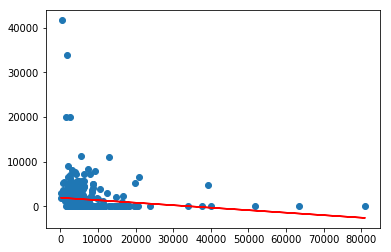

In [20]:
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()